In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Import Dataset 

In [2]:
moviedata = pd.read_csv('Final-CLEAN-Dataset.csv')
moviedata.head(n = 10)

,ID,Title,Decade,Age of Movie,Age Category,IMDb,Rotten,Availability,Genres,Country,Language,Runtime
0,1,Inception,2010s,12,13+,8.8,87,1,Action,United States,English,148
1,2,The Matrix,1990s,23,18+,8.7,87,1,Action,United States,English,136
2,3,Avengers: Infinity War,2010s,4,13+,8.5,84,1,Action,United States,English,149
3,4,Back to the Future,1980s,37,7+,8.5,96,1,Adventure,United States,English,116
4,5,"The Good, the Bad and the Ugly",1960s,56,18+,8.8,97,2,Western,Italy,Italian,161
5,6,Spider-Man: Into the Spider-Verse,2010s,4,7+,8.4,97,1,Animation,United States,English,117
6,7,The Pianist,2000s,20,18+,8.5,95,2,Biography,United Kingdom,English,150
7,8,Django Unchained,2010s,10,18+,8.4,87,1,Drama,United States,English,165
8,9,Raiders of the Lost Ark,1980s,41,7+,8.4,95,1,Action,United States,English,115
9,10,Inglourious Basterds,2000s,13,18+,8.3,89,1,Adventure,Germany,English,153


In [3]:
moviedata.describe()

,ID,Age of Movie,IMDb,Rotten,Availability,Runtime
count,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000
mean,2778.500000,14.583693,6.230148,60.207163,1.055796,100.980202
std,1604.023379,13.990212,1.078126,22.265142,0.234205,22.003043
min,1.000000,1.000000,1.100000,2.000000,1.000000,2.000000
25%,1389.750000,5.000000,5.600000,45.000000,1.000000,90.000000
50%,2778.500000,10.000000,6.300000,61.000000,1.000000,99.000000
75%,4167.250000,19.000000,7.000000,77.000000,1.000000,110.250000
max,5556.000000,120.000000,9.000000,100.000000,3.000000,359.000000


In [4]:
# Quantile 25% and 75%
Q1 = moviedata['Runtime'].quantile(0.25)
Q3 = moviedata['Runtime'].quantile(0.75)

#Interquartile range (IQR)
IQR = Q3 - Q1

# Remove the outliers
moviedata = moviedata.drop(moviedata[(moviedata['Runtime'] <= Q1 - 1.5*IQR) | (moviedata['Runtime'] >= Q3 + 1.5*IQR)].index)
moviedata

,ID,Title,Decade,Age of Movie,Age Category,IMDb,Rotten,Availability,Genres,Country,Language,Runtime
1,2,The Matrix,1990s,23,18+,8.7,87,1,Action,United States,English,136
3,4,Back to the Future,1980s,37,7+,8.5,96,1,Adventure,United States,English,116
5,6,Spider-Man: Into the Spider-Verse,2010s,4,7+,8.4,97,1,Animation,United States,English,117
8,9,Raiders of the Lost Ark,1980s,41,7+,8.4,95,1,Action,United States,English,115
10,11,Taxi Driver,1970s,46,18+,8.3,95,1,Crime,United States,English,114
...,...,...,...,...,...,...,...,...,...,...,...,...
5543,5544,Own the Room,2020s,1,7+,6.4,46,1,Documentary,United States,English,91
5544,5545,Unidentified Flying Oddball,1970s,43,all,5.2,45,1,Adventure,United States,English,93
5546,5547,'Twas the Night,2000s,21,all,5.3,45,1,Comedy,United States,English,84
5551,5552,The Story of the Animated Drawing,1950s,67,all,7.6,41,1,Adventure,United States,English,60


In [5]:
moviedata.describe()

,ID,Age of Movie,IMDb,Rotten,Availability,Runtime
count,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000
mean,2763.293712,14.524156,6.179870,59.836273,1.057132,100.319018
std,1581.942544,13.671695,1.064067,22.375588,0.237022,14.473748
min,2.000000,1.000000,1.100000,2.000000,1.000000,60.000000
25%,1386.750000,5.000000,5.600000,45.000000,1.000000,90.000000
50%,2752.500000,10.000000,6.300000,60.000000,1.000000,98.000000
75%,4143.250000,19.000000,6.900000,76.000000,1.000000,109.000000
max,5554.000000,102.000000,9.000000,100.000000,3.000000,140.000000


In [6]:
moviedata = moviedata.reset_index()
moviedata = moviedata.drop(columns = ['ID', 'index'])
ID = []
for i in range(1, len(moviedata) + 1):
    ID.append(i)
moviedata.insert(0, "ID", ID)
moviedata

,ID,Title,Decade,Age of Movie,Age Category,IMDb,Rotten,Availability,Genres,Country,Language,Runtime
0,1,The Matrix,1990s,23,18+,8.7,87,1,Action,United States,English,136
1,2,Back to the Future,1980s,37,7+,8.5,96,1,Adventure,United States,English,116
2,3,Spider-Man: Into the Spider-Verse,2010s,4,7+,8.4,97,1,Animation,United States,English,117
3,4,Raiders of the Lost Ark,1980s,41,7+,8.4,95,1,Action,United States,English,115
4,5,Taxi Driver,1970s,46,18+,8.3,95,1,Crime,United States,English,114
...,...,...,...,...,...,...,...,...,...,...,...,...
5211,5212,Own the Room,2020s,1,7+,6.4,46,1,Documentary,United States,English,91
5212,5213,Unidentified Flying Oddball,1970s,43,all,5.2,45,1,Adventure,United States,English,93
5213,5214,'Twas the Night,2000s,21,all,5.3,45,1,Comedy,United States,English,84
5214,5215,The Story of the Animated Drawing,1950s,67,all,7.6,41,1,Adventure,United States,English,60


In [7]:
moviedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5216 entries, 0 to 5215
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            5216 non-null   int64  
 1   Title         5216 non-null   object 
 2   Decade        5216 non-null   object 
 3   Age of Movie  5216 non-null   int64  
 4   Age Category  5216 non-null   object 
 5   IMDb          5216 non-null   float64
 6   Rotten        5216 non-null   int64  
 7   Availability  5216 non-null   int64  
 8   Genres        5216 non-null   object 
 9   Country       5216 non-null   object 
 10  Language      5216 non-null   object 
 11  Runtime       5216 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 489.1+ KB


Using Uni-Variate Linear Regression, test out various Numeric Variables to see which Variables can predict the IMDb Scores the most accurately.

Set up the Regression Problem with Train & Test Datasets

Intercept (Age of Movie):     b = [6.02367299]
Coefficients (Age of Movie):  a = [[0.0107745]]

              Age of Movie      IMDb
Age of Movie      1.000000  0.137142
IMDb              0.137142  1.000000

Goodness of Fit of Age of Movie (Train)
Explained Variance (R^2) 	: 0.018807815312321674
Mean Squared Error (MSE) 	: 1.1040411145342166

Goodness of Fit of Age of Movie (Test)
Explained Variance (R^2) 	: 0.009083274442397649
Mean Squared Error (MSE) 	: 1.1487039602958036



Intercept (Runtime):     b = [4.30328582]
Coefficients (Runtime):  a = [[0.01860904]]

          Runtime      IMDb
Runtime  1.000000  0.253711
IMDb     0.253711  1.000000

Goodness of Fit of Runtime (Train)
Explained Variance (R^2) 	: 0.06436951804779822
Mean Squared Error (MSE) 	: 1.067467992261914

Goodness of Fit of Runtime (Test)
Explained Variance (R^2) 	: 0.0561341920908055
Mean Squared Error (MSE) 	: 1.0331129107949253



Intercept (Rotten):     b = [4.49235951]
Coefficients (Rotten):  a = [[0.02814923]]


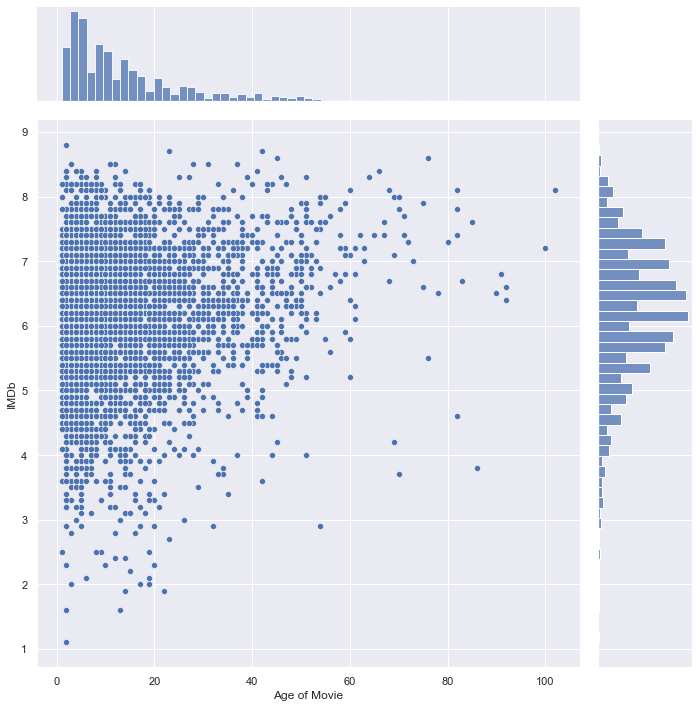

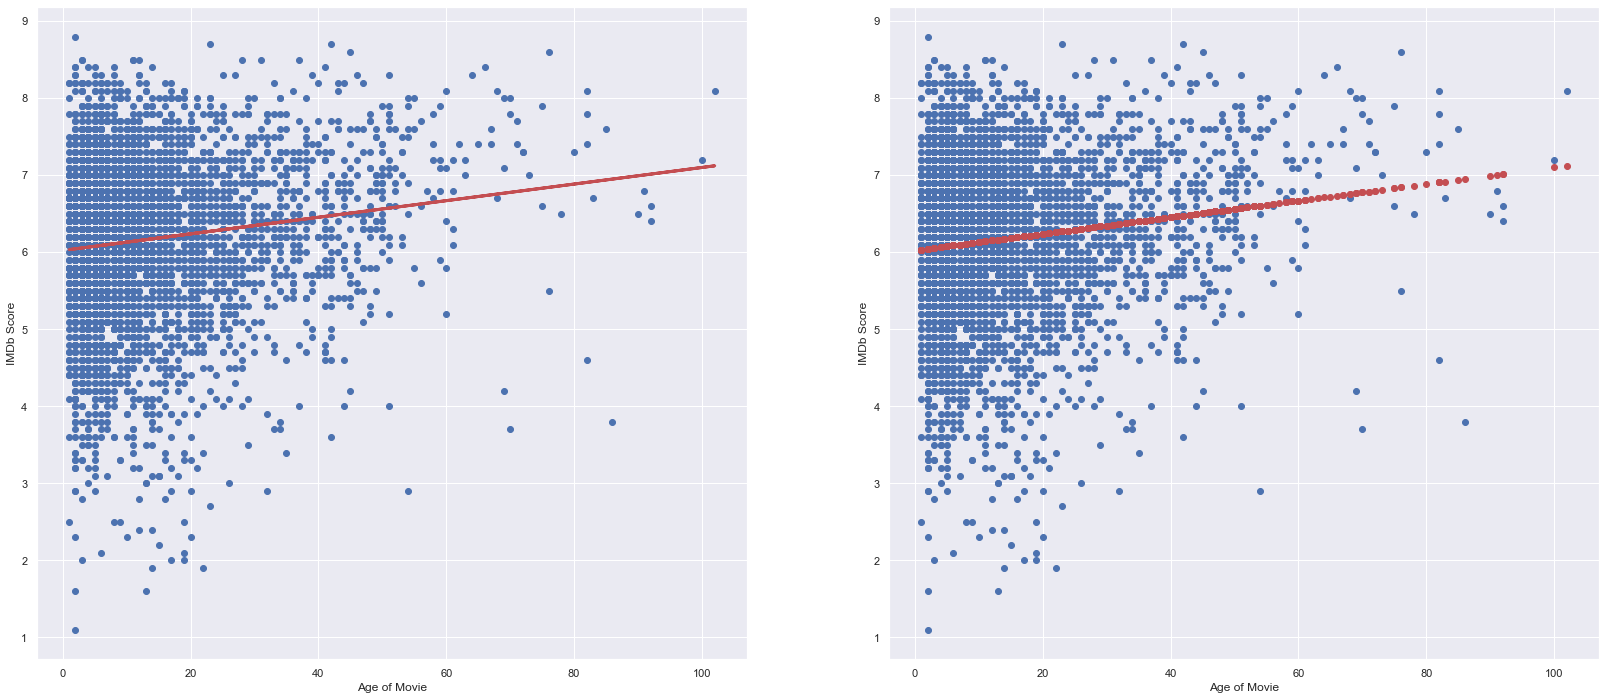

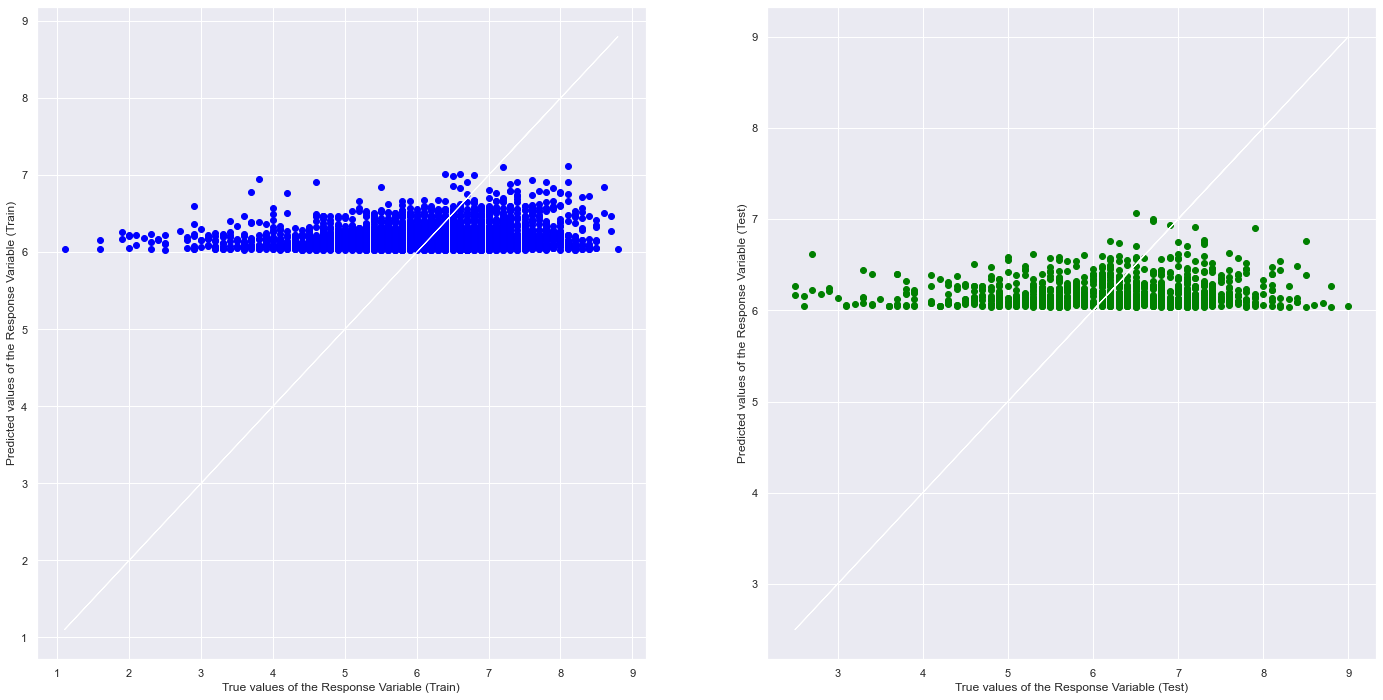

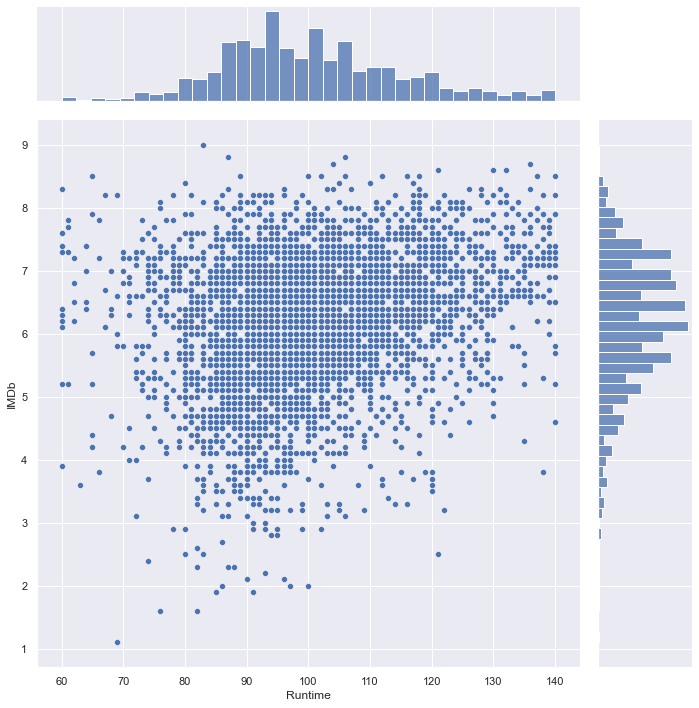

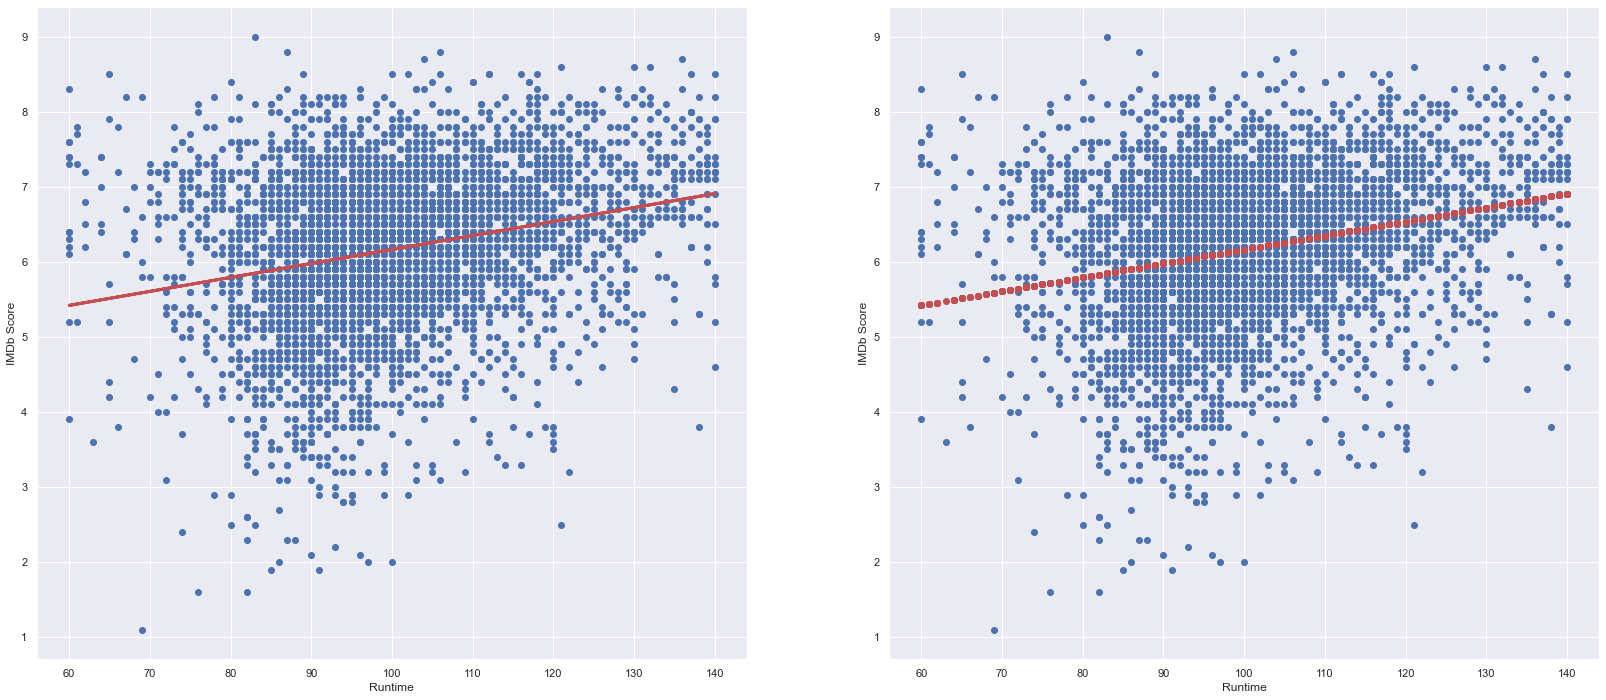

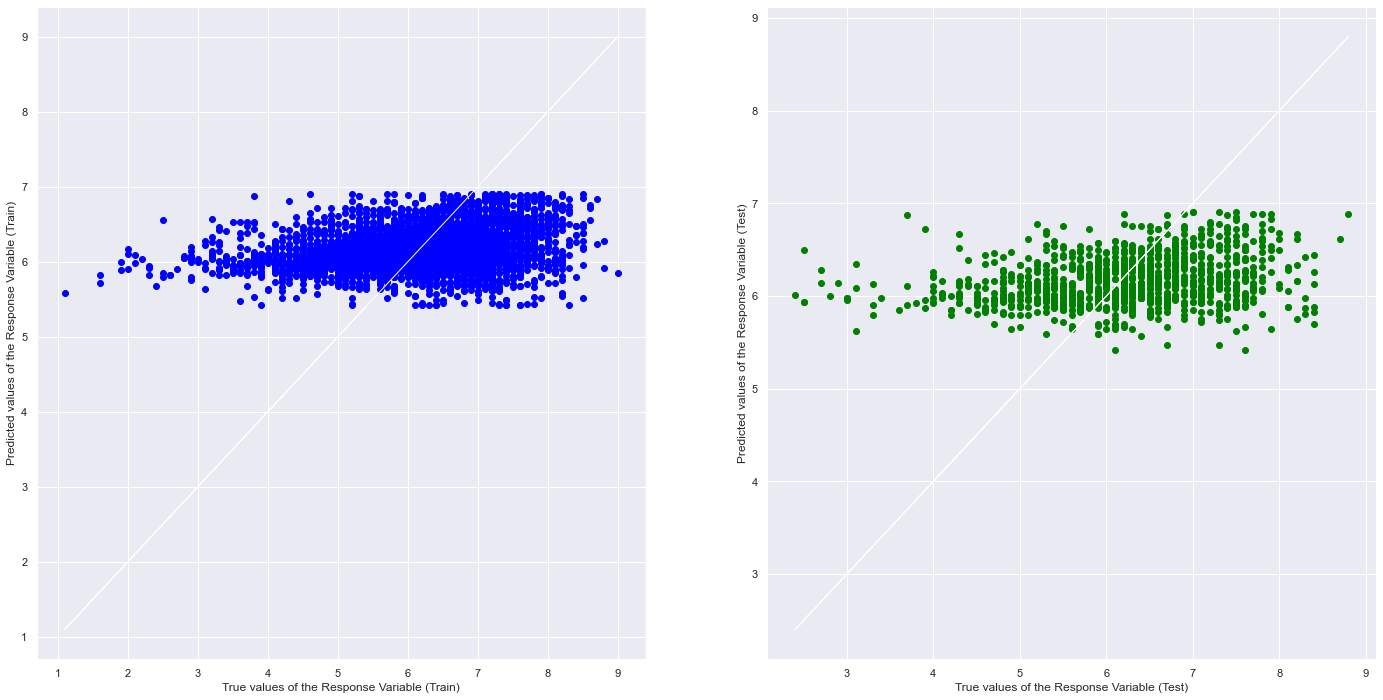

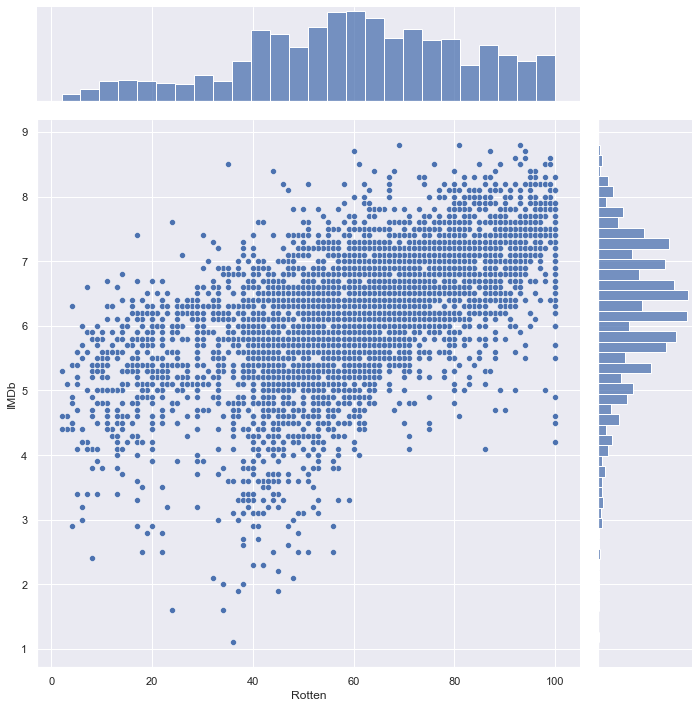

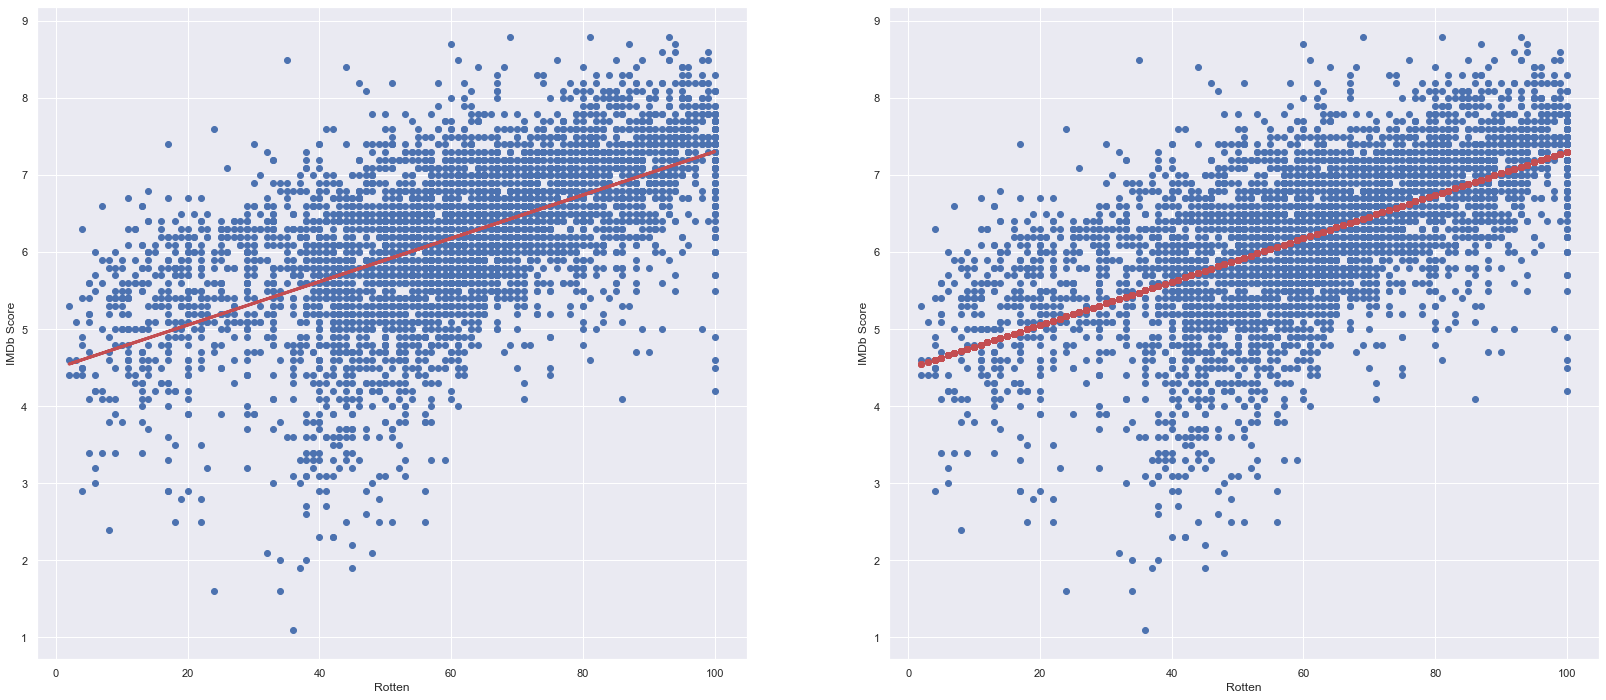

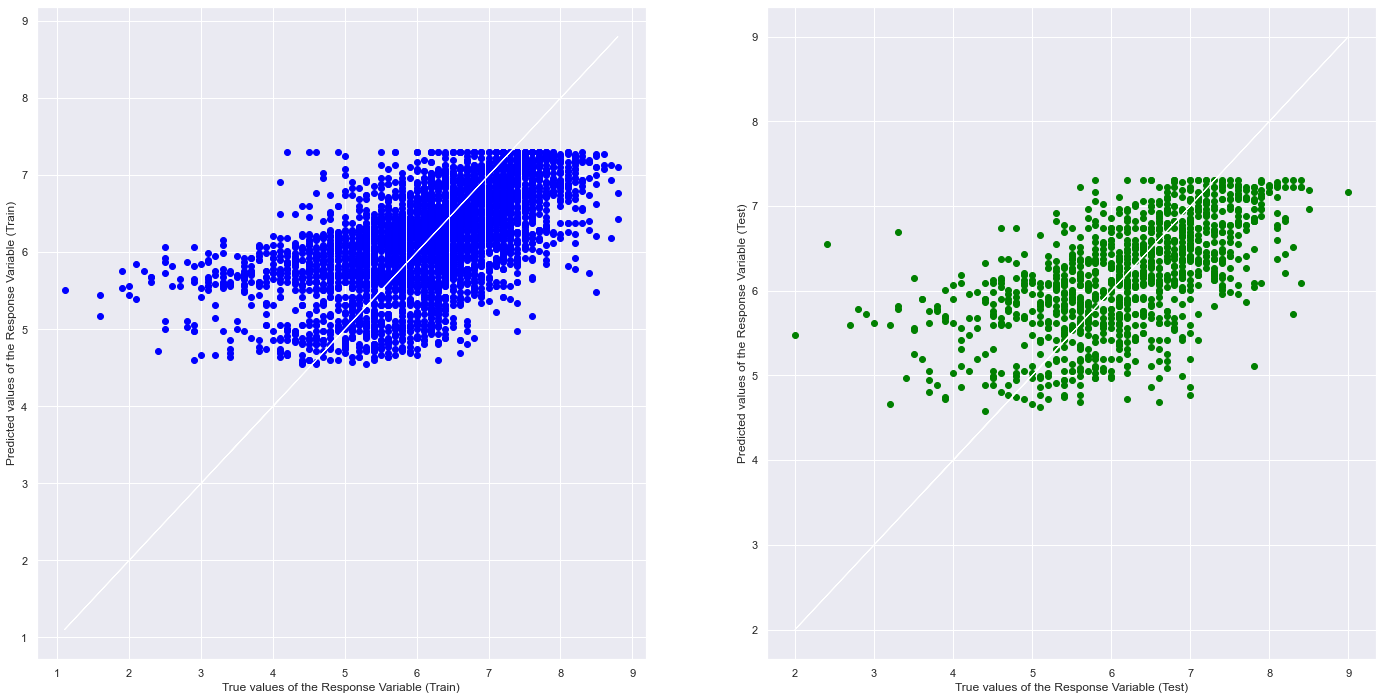

In [9]:
# Recall the Total-HP Dataset
IMDbScore = pd.DataFrame(moviedata['IMDb'])          # Response
Features = ['Age of Movie', 'Runtime', 'Rotten']     # Predictor

mse_train_list = []
mse_test_list = []

for col in Features:
    # Split the Dataset into Train and Test (Train: 80%, Test: 20%)
    Predictor = pd.DataFrame(moviedata[col])
    X_train, X_test, y_train, y_test = train_test_split(Predictor, IMDbScore, train_size = 0.8)

    # Linear Regression using Train Data
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    # Coefficients of the Linear Regression line
    print('Intercept ({}):     b = {}'.format(col, linreg.intercept_))
    print('Coefficients ({}):  a = {}'.format(col, linreg.coef_))
    print()

    # Create a joint dataframe by concatenating the two variables
    jointdf = pd.concat([X_train, y_train], axis = 1).reindex(X_train.index)
    jointdf1 = pd.concat([X_train, y_train], axis = 1).reindex(X_train.index)
    # Calculate the correlation between the two columns/variables
    print(jointdf.corr())
    print()

    # Jointplot of Total Train against HP Train
    sb.jointplot(data = jointdf1, x = col, y = "IMDb", height = 10)
    
    # Formula for the Regression line
    regline_x = X_train
    regline_y = linreg.intercept_ + linreg.coef_ * X_train

    y_train_pred = linreg.predict(X_train)

    # Plot the Linear Regression line
    f, axes = plt.subplots(1, 2, figsize=(28, 12))

    axes[0].scatter(X_train, y_train)
    axes[0].plot(regline_x, regline_y, 'r-', linewidth = 3)
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("IMDb Score")

    axes[1].scatter(X_train, y_train)
    axes[1].scatter(X_train, y_train_pred, color = "r")
    axes[1].set_xlabel(col)
    axes[1].set_ylabel("IMDb Score")

    # Predict Total values corresponding to HP
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
    mse_train = mean_squared_error(y_train, y_train_pred)
    print("Goodness of Fit of {} (Train)".format(col))
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mse_train)
    mse_train_list.append((col, mse_train))
    print()

    # Check the Goodness of Fit (on Test Data)
    mse_test = mean_squared_error(y_test, y_test_pred)
    print("Goodness of Fit of {} (Test)".format(col))
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mse_test)
    mse_test_list.append((col, mse_test))
    print('\n' * 2)

    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(y_train, y_train_pred, color = "blue")
    axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
    axes[0].set_xlabel("True values of the Response Variable (Train)")
    axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
    axes[1].scatter(y_test, y_test_pred, color = "green")
    axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
    axes[1].set_xlabel("True values of the Response Variable (Test)")
    axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

In [25]:
# Find the variable with the most accurate model (the model whose MSE is the smallest)
def most_accurate(mse_train_list, mse_test_list):
    a = []
    b = []
    
    for i in mse_train_list:
        a.append(i[1])
    
    for i in mse_test_list:
        b.append(i[1]) 
        
    best_train = min(a)
    best_test = min(b)
   
    for i in range(0, len(mse_train_list)):
        if mse_train_list[i][1] == best_train:
            best_train = mse_train_list[i]
            
    for i in range(0, len(mse_test_list)):
        if mse_test_list[i][1] == best_test:
            best_test = mse_test_list[i]
    return best_train, best_test

In [26]:
most_accurate(mse_train_list, mse_test_list)

(('Rotten', 0.7434293309162698), ('Rotten', 0.7264305394202851))

## Conclusion

The Rotten Tomatoes Score test set had the lowest MSE of 0.72643 and the highest R^2 value of 0.7264305

Runtime had the second lowest MSE of 1.0331129 and the second highest R^2 value of 0.056134

Age of Movie had the highest MSE of 1.1487 and lowest R^2 value of 0.0090832

From this, we can conclude that the Rotten Tomatoes score model is the most accurate in predicting the IMDb score, followed by Runtime, and lastly the Age of the Movie.